In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.decomposition import PCA
import utils

In [ ]:
# prefered magic functions for jupyter notebook
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [3]:
zarr_files = utils.find_files(root_dir = '/root/capsule/data', endswith='zarr')

In [4]:
pkl_files = utils.find_files(root_dir = '/root/capsule/data', endswith='.pkl', return_dir=False)

In [5]:
meta_obj = utils.load_pickle_file(pkl_files[0])

In [6]:
import zarr
import dask
import dask.array as da
me_store = zarr.DirectoryStore(zarr_files[0])
me_frames = da.from_zarr(me_store, component='data')

In [7]:
crop_region=(250, 300,  550, 500)
crop_y_start, crop_x_start, crop_y_end, crop_x_end = crop_region

In [8]:
me_frames2 = me_frames[:, crop_y_start:crop_y_end, crop_x_start:crop_x_end]

In [9]:
n_frames, height, width = me_frames2.shape
new_shape = (n_frames, height * width)
new_chunks = (100, new_shape[0])
me_frames3 = me_frames2.reshape(new_shape)

In [10]:
me_frames3

dask.array<reshape, shape=(221611, 48400), dtype=float32, chunksize=(100, 48400), chunktype=numpy.ndarray>

In [11]:
value = dask.delayed(me_frames3)

In [12]:
for chunk in me_frames2.delayed():
    chunk_data = da.from_delay(chunk, (100, ))
    print(chunk_data.shape)

AttributeError: 'Array' object has no attribute 'delayed'

In [13]:
dask.__version__

'2023.5.0'

In [14]:
plt.imshow(me_frames[1000])

In [15]:
### Use object
from PCAgenerator import PCAgenerator

In [18]:
me_pca = PCAgenerator(zarr_files[0], pkl_file = pkl_files[0], crop_region=(250, 300,  500, 450))


In [20]:
me_pca._apply_pca_to_motion_energy()


Loaded frames (221611, 492, 658)
Applying crop to me frames (250, 300, 500, 450)
new reshaped array array shape: (221611, 36300)
rechunked array size: (100, 36300)
Skipping standardization of data.


/opt/conda/lib/python3.8/site-packages/dask/array/core.py:1713: FutureWarning: The `numpy.may_share_memory` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


ValueError: setting an array element with a sequence.

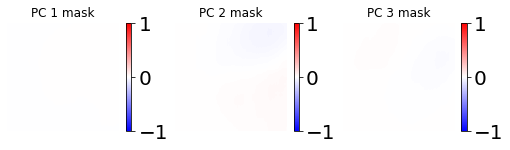

In [ ]:

fig = me_pca.plot_spatial_masks()

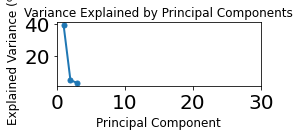

In [ ]:
fig = me_pca.plot_explained_variance()